In [1]:
# –£—Å—Ç–∞–Ω–æ–≤–∫–∞ –∏ –ø—Ä–æ–≤–µ—Ä–∫–∞ –ø–∞–∫–µ—Ç–æ–≤
%pip install --upgrade pip
%pip install pandas nltk scikit-learn label-studio matplotlib wget tqdm

Note: you may need to restart the kernel to use updated packages.
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached scipy-1.15.2-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with s

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opentelemetry-proto 1.31.1 requires protobuf<6.0,>=5.0, but you have protobuf 6.31.0rc1 which is incompatible.


In [1]:
%pip install seaborn --upgrade

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


In [12]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from tqdm import tqdm
import os
import wget
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import (f1_score, precision_score, 
                            recall_score, accuracy_score,
                            confusion_matrix, classification_report)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from pathlib import Path

In [13]:
# –ó–∞–≥—Ä—É–∑–∫–∞ –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã—Ö —Ä–µ—Å—É—Ä—Å–æ–≤ NLTK
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rasda\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rasda\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\rasda\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rasda\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
# –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è –ª–µ–º–º–∞—Ç–∏–∑–∞—Ç–æ—Ä–∞ –∏ —Å—Ç–æ–ø-—Å–ª–æ–≤
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('russian'))

In [15]:
# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∏ —Ç–µ–∫—Å—Ç–∞
def preprocess_text(text):
    # –¢–æ–∫–µ–Ω–∏–∑–∞—Ü–∏—è
    tokens = word_tokenize(text.lower())
    # –£–¥–∞–ª–µ–Ω–∏–µ —Å—Ç–æ–ø-—Å–ª–æ–≤ –∏ –ø—É–Ω–∫—Ç—É–∞—Ü–∏–∏, –ª–µ–º–º–∞—Ç–∏–∑–∞—Ü–∏—è
    tokens = [lemmatizer.lemmatize(token) for token in tokens 
              if token.isalpha() and token not in stop_words]
    return ' '.join(tokens)

In [19]:
# –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö –∏ –ø–µ—Ä–≤–∏—á–Ω—ã–π –∞–Ω–∞–ª–∏–∑ –¥–∞—Ç–∞—Å–µ—Ç–∞
try:
    df = pd.read_csv("fontanka.csv", encoding='utf-8', on_bad_lines='skip')
except UnicodeDecodeError:
    df = pd.read_csv("fontanka.csv", encoding='cp1251', on_bad_lines='skip')

# –ü—Ä–æ–≤–µ—Ä–∫–∞ —Å—Ç—Ä—É–∫—Ç—É—Ä—ã –¥–∞–Ω–Ω—ã—Ö
print(f"–†–∞–∑–º–µ—Ä –¥–∞—Ç–∞—Å–µ—Ç–∞: {df.shape}")
print("\n–ü–µ—Ä–≤—ã–µ 5 —Å—Ç—Ä–æ–∫:")
display(df.head())

print("\n–ò–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ —Å—Ç–æ–ª–±—Ü–∞—Ö:")
print(df.info())

print("\n–ü—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è:")
print(df.isna().sum())

print("\n–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ —Ç–µ–º–∞–º:")
print(df['topic'].value_counts().head(10))

–†–∞–∑–º–µ—Ä –¥–∞—Ç–∞—Å–µ—Ç–∞: (86547, 4)

–ü–µ—Ä–≤—ã–µ 5 —Å—Ç—Ä–æ–∫:


url  \
0  https://www.fontanka.ru/2023/02/28/72096011/   
1  https://www.fontanka.ru/2023/08/29/72650309/   
2  https://www.fontanka.ru/2023/04/30/72254204/   
3  https://www.fontanka.ru/2023/09/08/72686495/   
4  https://www.fontanka.ru/2023/03/07/72115772/   

                                               title  \
0  ¬´–ë—Ä–∞—Ç–∞-2¬ª –≤—Å–ø–æ–º–Ω—è—Ç –±–µ–∑ ¬´–ü–æ–ª–∫–æ–≤–Ω–∏–∫—É –Ω–∏–∫—Ç–æ –Ω–µ –ø–∏...   
1  –ü—Ä–æ—Ç–∏–≤ –æ—Å—É–∂–¥–µ–Ω–Ω–æ–≥–æ –∞—Å–ø–∏—Ä–∞–Ω—Ç–∞ –ú–∏—Ñ—Ç–∞—Ö–æ–≤–∞ –≤–æ–∑–±—É–¥–∏...   
2  –ö–∞–∫ –ø—Ä–∏–≥–æ—Ç–æ–≤–∏—Ç—å –∏–¥–µ–∞–ª—å–Ω—ã–π —à–∞—à–ª—ã–∫. 10 —Ä–µ—Ü–µ–ø—Ç–æ–≤ ...   
3  ¬´–ú—ã –ø—Ä–∞–≤–¥–∞ –æ–¥–Ω–∏ –æ—Å—Ç–∞–ª–∏—Å—å¬ª. –ö–∞–ø–∏—Ç–∞–Ω ¬´–ö–ª–∞–≤–¥–∏–∏ –ï–ª...   
4  –ü–æ—Å–ª–µ –ø—É–±–ª–∏–∫–∞—Ü–∏–∏ ¬´–§–æ–Ω—Ç–∞–Ω–∫–∏¬ª —Å–µ–º—å–µ —Ä–∞–∑–≤–µ–¥—á–∏–∫–∞, ...   

                                                text        topic  
0  –°–æ—Å—Ç–∞–≤ —É—á–∞—Å—Ç–Ω–∏–∫–æ–≤ —Ñ–µ—Å—Ç–∏–≤–∞–ª—è ¬´–ë—Ä–∞—Ç-2: –ñ–∏–≤–æ–π Sou...   –ê—Ñ–∏—à–∞ Plus  
1  –§–°–ë –≤–æ–∑–±—É–¥–∏–ª–∞ –ø—Ä–æ—Ç–∏–≤ –∞—Å–ø–∏—Ä–∞–Ω—Ç–∞ –º–µ—Ö–∞–Ω–∏–∫–æ-–º–∞—Ç–µ–º–∞...     –û–±—â–µ—Å—Ç–≤–æ  
2  –£–∂–µ –∑–∞–∫—É–ø–∏–ª–∏—Å—å –º—è—Å–æ–º –¥–ª—è —à–∞—à–ª—ã–∫–∞ –∏–ª–∏ —Ç–æ–ª—å–∫–æ —Å–æ...  –û–±—Ä–∞–∑ –∂–∏–∑–Ω–∏  
3  –ê–≤—Ç–æ—Ä: –ö—Å–µ–Ω–∏—è –ü–æ—Ç–µ–µ–≤–∞, –ê–Ω–Ω–∞ –ù–∞–∑–∞—Ä–æ–≤–∞ / ¬´–§–æ–Ω—Ç–∞–Ω...     –û–±—â–µ—Å—Ç–≤–æ  
4  –°–µ–º—å—è –ø–æ–≥–∏–±—à–µ–≥–æ –∫–æ–Ω—Ç—Ä–∞–∫—Ç–Ω–∏–∫–∞ –î–º–∏—Ç—Ä–∏—è –ó–∞—Ö–∞—Ä—á—É–∫–∞...     –û–±—â–µ—Å—Ç–≤–æ


–ò–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ —Å—Ç–æ–ª–±—Ü–∞—Ö:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86547 entries, 0 to 86546
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   url     86547 non-null  object
 1   title   86547 non-null  object
 2   text    86534 non-null  object
 3   topic   86534 non-null  object
dtypes: object(4)
memory usage: 2.6+ MB
None

–ü—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è:
url       0
title     0
text     13
topic    13
dtype: int64

–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ —Ç–µ–º–∞–º:
topic
–û–±—â–µ—Å—Ç–≤–æ         23220
–ü—Ä–æ–∏—Å—à–µ—Å—Ç–≤–∏—è     22917
–ì–æ—Ä–æ–¥            12975
–í–ª–∞—Å—Ç—å            5426
–ê—Ñ–∏—à–∞ Plus        4603
–ë–∏–∑–Ω–µ—Å            3290
–°—Ç—Ä–æ–∏—Ç–µ–ª—å—Å—Ç–≤–æ     3236
–°–ø–æ—Ä—Ç             3113
–ü–æ–ª–∏—Ç–∏–∫–∞          1430
–§–∏–Ω–∞–Ω—Å—ã           1160
Name: count, dtype: int64


In [14]:
print(nltk.data.path)

['C:\\Users\\rasda/nltk_data', 'c:\\Users\\rasda\\AppData\\Local\\Programs\\Python\\Python312\\nltk_data', 'c:\\Users\\rasda\\AppData\\Local\\Programs\\Python\\Python312\\share\\nltk_data', 'c:\\Users\\rasda\\AppData\\Local\\Programs\\Python\\Python312\\lib\\nltk_data', 'C:\\Users\\rasda\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data']


In [ ]:
# –ó–∞–≥—Ä—É–∑–∫–∞ –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã—Ö —Ä–µ—Å—É—Ä—Å–æ–≤
nltk.download('punkt', quiet=True)       # –û—Å–Ω–æ–≤–Ω–æ–π —Ç–æ–∫–µ–Ω–∏–∑–∞—Ç–æ—Ä
nltk.download('punkt_tab', quiet=True)   # –î–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–µ —Ç–∞–±–ª–∏—Ü—ã
nltk.download('stopwords', quiet=True)   # –°—Ç–æ–ø-—Å–ª–æ–≤–∞
nltk.download('wordnet', quiet=True)     # –î–ª—è –ª–µ–º–º–∞—Ç–∏–∑–∞—Ü–∏–∏
nltk.download('omw-1.4', quiet=True)     # –ú–Ω–æ–≥–æ—è–∑—ã—á–Ω–∞—è –ø–æ–¥–¥–µ—Ä–∂–∫–∞

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

print("–í—Å–µ —Ä–µ—Å—É—Ä—Å—ã NLTK —É—Å–ø–µ—à–Ω–æ –∑–∞–≥—Ä—É–∂–µ–Ω—ã")

–í—Å–µ —Ä–µ—Å—É—Ä—Å—ã NLTK —É—Å–ø–µ—à–Ω–æ –∑–∞–≥—Ä—É–∂–µ–Ω—ã


In [20]:
# –ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö
def clean_text_simple(text):
    """–£–ø—Ä–æ—â–µ–Ω–Ω–∞—è –æ—á–∏—Å—Ç–∫–∞ —Ç–µ–∫—Å—Ç–∞ –¥–ª—è –∞–Ω–∞–ª–∏–∑–∞ —Ç–æ–Ω–∞–ª—å–Ω–æ—Å—Ç–∏"""
    if pd.isna(text):
        return ""
    
    # 1. –ü—Ä–∏–≤–æ–¥–∏–º –∫ –Ω–∏–∂–Ω–µ–º—É —Ä–µ–≥–∏—Å—Ç—Ä—É
    text = str(text).lower()
    
    # 2. –£–¥–∞–ª—è–µ–º –∫–∞–≤—ã—á–∫–∏ 
    text = text.replace('¬´', '').replace('¬ª', '')
    
    return text

# –ü—Ä–∏–º–µ–Ω—è–µ–º –æ—á–∏—Å—Ç–∫—É
df['title_clean'] = df['title'].apply(clean_text_simple)

# –ü—Ä–æ–≤–µ—Ä–∫–∞
print("–ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö:")
for i in range(3):
    print(f"–ë—ã–ª–æ: {df['title'].iloc[i]}")
    print(f"–°—Ç–∞–ª–æ: {df['title_clean'].iloc[i]}\n")

–ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö:
–ë—ã–ª–æ: ¬´–ë—Ä–∞—Ç–∞-2¬ª –≤—Å–ø–æ–º–Ω—è—Ç –±–µ–∑ ¬´–ü–æ–ª–∫–æ–≤–Ω–∏–∫—É –Ω–∏–∫—Ç–æ –Ω–µ –ø–∏—à–µ—Ç¬ª. ¬´–ë–∏-2¬ª –∏ ¬´–°–ø–ª–∏–Ω–∞¬ª –Ω–µ –±—É–¥–µ—Ç –Ω–∞ –∫–æ–Ω—Ü–µ—Ä—Ç–µ-—Å–∞—É–Ω–¥—Ç—Ä–µ–∫–µ
–°—Ç–∞–ª–æ: –±—Ä–∞—Ç–∞-2 –≤—Å–ø–æ–º–Ω—è—Ç –±–µ–∑ –ø–æ–ª–∫–æ–≤–Ω–∏–∫—É –Ω–∏–∫—Ç–æ –Ω–µ –ø–∏—à–µ—Ç. –±–∏-2 –∏ —Å–ø–ª–∏–Ω–∞ –Ω–µ –±—É–¥–µ—Ç –Ω–∞ –∫–æ–Ω—Ü–µ—Ä—Ç–µ-—Å–∞—É–Ω–¥—Ç—Ä–µ–∫–µ

–ë—ã–ª–æ: –ü—Ä–æ—Ç–∏–≤ –æ—Å—É–∂–¥–µ–Ω–Ω–æ–≥–æ –∞—Å–ø–∏—Ä–∞–Ω—Ç–∞ –ú–∏—Ñ—Ç–∞—Ö–æ–≤–∞ –≤–æ–∑–±—É–¥–∏–ª–∏ –Ω–æ–≤–æ–µ –¥–µ–ª–æ. –û–Ω –¥–æ–ª–∂–µ–Ω –±—ã–ª –≤—ã–π—Ç–∏ —á–µ—Ä–µ–∑ –Ω–µ–¥–µ–ª—é
–°—Ç–∞–ª–æ: –ø—Ä–æ—Ç–∏–≤ –æ—Å—É–∂–¥–µ–Ω–Ω–æ–≥–æ –∞—Å–ø–∏—Ä–∞–Ω—Ç–∞ –º–∏—Ñ—Ç–∞—Ö–æ–≤–∞ –≤–æ–∑–±—É–¥–∏–ª–∏ –Ω–æ–≤–æ–µ –¥–µ–ª–æ. –æ–Ω –¥–æ–ª–∂–µ–Ω –±—ã–ª –≤—ã–π—Ç–∏ —á–µ—Ä–µ–∑ –Ω–µ–¥–µ–ª—é

–ë—ã–ª–æ: –ö–∞–∫ –ø—Ä–∏–≥–æ—Ç–æ–≤–∏—Ç—å –∏–¥–µ–∞–ª—å–Ω—ã–π —à–∞—à–ª—ã–∫. 10 —Ä–µ—Ü–µ–ø—Ç–æ–≤ –º–∞—Ä–∏–Ω–∞–¥–æ–≤
–°—Ç–∞–ª–æ: –∫–∞–∫ –ø—Ä–∏–≥–æ—Ç–æ–≤–∏—Ç—å –∏–¥–µ–∞–ª—å–Ω—ã–π —à–∞—à–ª—ã–∫. 10 —Ä–µ—Ü–µ–ø—Ç–æ–≤ –º–∞—Ä

In [21]:
df.head()

url  \
0  https://www.fontanka.ru/2023/02/28/72096011/   
1  https://www.fontanka.ru/2023/08/29/72650309/   
2  https://www.fontanka.ru/2023/04/30/72254204/   
3  https://www.fontanka.ru/2023/09/08/72686495/   
4  https://www.fontanka.ru/2023/03/07/72115772/   

                                               title  \
0  ¬´–ë—Ä–∞—Ç–∞-2¬ª –≤—Å–ø–æ–º–Ω—è—Ç –±–µ–∑ ¬´–ü–æ–ª–∫–æ–≤–Ω–∏–∫—É –Ω–∏–∫—Ç–æ –Ω–µ –ø–∏...   
1  –ü—Ä–æ—Ç–∏–≤ –æ—Å—É–∂–¥–µ–Ω–Ω–æ–≥–æ –∞—Å–ø–∏—Ä–∞–Ω—Ç–∞ –ú–∏—Ñ—Ç–∞—Ö–æ–≤–∞ –≤–æ–∑–±—É–¥–∏...   
2  –ö–∞–∫ –ø—Ä–∏–≥–æ—Ç–æ–≤–∏—Ç—å –∏–¥–µ–∞–ª—å–Ω—ã–π —à–∞—à–ª—ã–∫. 10 —Ä–µ—Ü–µ–ø—Ç–æ–≤ ...   
3  ¬´–ú—ã –ø—Ä–∞–≤–¥–∞ –æ–¥–Ω–∏ –æ—Å—Ç–∞–ª–∏—Å—å¬ª. –ö–∞–ø–∏—Ç–∞–Ω ¬´–ö–ª–∞–≤–¥–∏–∏ –ï–ª...   
4  –ü–æ—Å–ª–µ –ø—É–±–ª–∏–∫–∞—Ü–∏–∏ ¬´–§–æ–Ω—Ç–∞–Ω–∫–∏¬ª —Å–µ–º—å–µ —Ä–∞–∑–≤–µ–¥—á–∏–∫–∞, ...   

                                                text        topic  \
0  –°–æ—Å—Ç–∞–≤ —É—á–∞—Å—Ç–Ω–∏–∫–æ–≤ —Ñ–µ—Å—Ç–∏–≤–∞–ª—è ¬´–ë—Ä–∞—Ç-2: –ñ–∏–≤–æ–π Sou...   –ê—Ñ–∏—à–∞ Plus   
1  –§–°–ë –≤–æ–∑–±—É–¥–∏–ª–∞ –ø—Ä–æ—Ç–∏–≤ –∞—Å–ø–∏—Ä–∞–Ω—Ç–∞ –º–µ—Ö–∞–Ω–∏–∫–æ-–º–∞—Ç–µ–º–∞...     –û–±—â–µ—Å—Ç–≤–æ   
2  –£–∂–µ –∑–∞–∫—É–ø–∏–ª–∏—Å—å –º—è—Å–æ–º –¥–ª—è —à–∞—à–ª—ã–∫–∞ –∏–ª–∏ —Ç–æ–ª—å–∫–æ —Å–æ...  –û–±—Ä–∞–∑ –∂–∏–∑–Ω–∏   
3  –ê–≤—Ç–æ—Ä: –ö—Å–µ–Ω–∏—è –ü–æ—Ç–µ–µ–≤–∞, –ê–Ω–Ω–∞ –ù–∞–∑–∞—Ä–æ–≤–∞ / ¬´–§–æ–Ω—Ç–∞–Ω...     –û–±—â–µ—Å—Ç–≤–æ   
4  –°–µ–º—å—è –ø–æ–≥–∏–±—à–µ–≥–æ –∫–æ–Ω—Ç—Ä–∞–∫—Ç–Ω–∏–∫–∞ –î–º–∏—Ç—Ä–∏—è –ó–∞—Ö–∞—Ä—á—É–∫–∞...     –û–±—â–µ—Å—Ç–≤–æ   

                                         title_clean  
0  –±—Ä–∞—Ç–∞-2 –≤—Å–ø–æ–º–Ω—è—Ç –±–µ–∑ –ø–æ–ª–∫–æ–≤–Ω–∏–∫—É –Ω–∏–∫—Ç–æ –Ω–µ –ø–∏—à–µ—Ç...  
1  –ø—Ä–æ—Ç–∏–≤ –æ—Å—É–∂–¥–µ–Ω–Ω–æ–≥–æ –∞—Å–ø–∏—Ä–∞–Ω—Ç–∞ –º–∏—Ñ—Ç–∞—Ö–æ–≤–∞ –≤–æ–∑–±—É–¥–∏...  
2  –∫–∞–∫ –ø—Ä–∏–≥–æ—Ç–æ–≤–∏—Ç—å –∏–¥–µ–∞–ª—å–Ω—ã–π —à–∞—à–ª—ã–∫. 10 —Ä–µ—Ü–µ–ø—Ç–æ–≤ ...  
3  –º—ã –ø—Ä–∞–≤–¥–∞ –æ–¥–Ω–∏ –æ—Å—Ç–∞–ª–∏—Å—å. –∫–∞–ø–∏—Ç–∞–Ω –∫–ª–∞–≤–¥–∏–∏ –µ–ª–∞–Ω—Å...  
4  –ø–æ—Å–ª–µ –ø—É–±–ª–∏–∫–∞—Ü–∏–∏ —Ñ–æ–Ω—Ç–∞–Ω–∫–∏ —Å–µ–º—å–µ —Ä–∞–∑–≤–µ–¥—á–∏–∫–∞, —É–º...

‚úÖ –§–∞–π–ª —Å —Ä–∞–∑–º–µ—Ç–∫–æ–π —Å–æ—Ö—Ä–∞–Ω—ë–Ω: labeled_rule_based.csv
–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ç–æ–Ω–∞–ª—å–Ω–æ—Å—Ç–∏:
sentiment_ruleb
neutral     73377
negative    11111
positive     2059
Name: count, dtype: int64


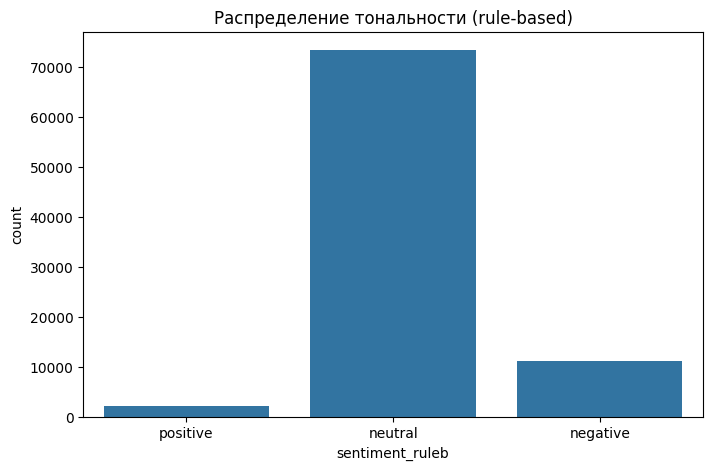


–ü—Ä–∏–º–µ—Ä—ã —Ä–∞–∑–º–µ—Ç–∫–∏:

POSITIVE:
1. –ü—É—Ç–∏–Ω –≤—ã—Å—Ç—É–ø–∏–ª —Å –æ–±—Ä–∞—â–µ–Ω–∏–µ–º –∫ –≥–æ—Å—Ç—è–º –∫–æ–Ω—Ü–µ—Ä—Ç–∞ ¬´–õ–µ–Ω–∏–Ω–≥—Ä–∞–¥—Å–∫–∞—è —Å–∏–º—Ñ–æ–Ω–∏—è –Ω–∞ –±–µ—Ä–µ–≥–∞—Ö –ù–µ–≤—ã¬ª
2. –í –†–æ—Å—Å–∏–∏ –ø–æ—è–≤–∏–ª—Å—è –Ω–æ–≤—ã–π –ø—Ä–∞–∑–¥–Ω–∏–∫

NEUTRAL:
1. –û—à–∏–±–∫–∞ —Å –±–æ—Ä–æ–¥–æ–π. –°–ö–ê –ø—Ä–æ–∏–≥—Ä—ã–≤–∞–µ—Ç, –Ω–æ –≤—Å–µ –µ—â–µ –Ω–∞ –ø—Ä–∞–≤–∏–ª—å–Ω–æ–º –ø—É—Ç–∏
2. –ü–æ–ª—å—à–∞ –Ω–µ –¥–∞—ë—Ç –¥–æ–±—Ä–æ. –° 1 –∏—é–Ω—è –≥—Ä—É–∑–æ–≤–∏–∫–∏ –∏–∑ –†–æ—Å—Å–∏–∏ –∏ –ë–µ–ª–æ—Ä—É—Å—Å–∏–∏ —Ç–∞–º –±–æ–ª—å—à–µ –Ω–µ –∂–¥—É—Ç

NEGATIVE:
1. –ì—Ä–æ—Å—Å–º–µ–π—Å—Ç–µ—Ä –∏–∑ –ì—Ä—É–∑–∏–∏ –ø–æ–¥–∞–ª–∞ –≤ —Å—É–¥ –Ω–∞ Netflix –∏–∑-–∑–∞ ¬´–•–æ–¥–∞ –∫–æ—Ä–æ–ª–µ–≤—ã¬ª
2. –ü–æ—Å–ª–µ —É–≤–æ–ª—å–Ω–µ–Ω–∏—è –†–∞–π–∫–∏–Ω–∞ –∏–∑ —Ç–µ–∞—Ç—Ä–∞–ª—å–Ω–æ–π —à–∫–æ–ª—ã –µ–≥–æ –∏–º–µ–Ω–∏ —Ä–µ–∫—Ç–æ—Ä–∞ —ç—Ç–æ–≥–æ —É—á—Ä–µ–∂–¥–µ–Ω–∏—è –∞—Ä–µ—Å—Ç–æ–≤–∞–ª–∏


In [ ]:
# Rule-based —Ä–∞–∑–º–µ—Ç–∫–∞ —Ç–æ–Ω–∞–ª—å–Ω–æ—Å—Ç–∏
def rule_based_sentiment(text):
    """–§—É–Ω–∫—Ü–∏—è –¥–ª—è –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Ç–æ–Ω–∞–ª—å–Ω–æ—Å—Ç–∏"""
    text = str(text).lower()
    
    # –ö–ª—é—á–µ–≤—ã–µ —Å–ª–æ–≤–∞ –∏ —Ñ—Ä–∞–∑—ã –¥–ª—è Fontanka
    positive_phrases = [
        '—É—Å–ø–µ—Ö', '–ø–æ–±–µ–¥–∞', '–Ω–∞–≥—Ä–∞–¥–∞', '—Ä–µ–∫–æ—Ä–¥', '—Ä–∞–∑–≤–∏—Ç–∏–µ',
        '—Ñ–µ—Å—Ç–∏–≤–∞–ª—å', '–∫–æ–Ω—Ü–µ—Ä—Ç', '–ø—Ä–∞–∑–¥–Ω–∏–∫', '–¥–æ—Å—Ç–∏–∂–µ–Ω–∏–µ', '–∏–Ω–Ω–æ–≤–∞—Ü–∏',
        '–±–ª–∞–≥–æ—Ç–≤–æ—Ä–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å', '–ø–æ–º–æ—â—å', '–ø–æ–¥–¥–µ—Ä–∂–∫–∞', '–æ—Ç–∫—Ä—ã—Ç–∏–µ'
    ]
    
    negative_phrases = [
        '–∞—Ä–µ—Å—Ç', '—Å–º–µ—Ä—Ç—å', '–¥—Ç–ø', '–ø–æ–∂–∞—Ä', '–ø—Ä–æ—Ç–µ—Å—Ç',
        '–∫–æ–Ω—Ñ–ª–∏–∫—Ç', '–æ–±–≤–∞–ª', '–∑–∞–ø—Ä–µ—Ç', '—Å—É–¥', '—É–±–∏–π—Å—Ç–≤–æ',
        '–≤–æ–∑–±—É–∂–¥–µ–Ω–æ –¥–µ–ª–æ', '–ø—Ä–∏–≥–æ–≤–æ—Ä', '–∫—Ä–∏–∑–∏—Å', '—Ç—Ä–∞–≥–µ–¥–∏',
        '–ø–æ–≥–∏–±', '—Ä–∞–∑–≥–æ–Ω', '—à—Ç—Ä–∞—Ñ', '–∑–∞–¥–µ—Ä–∂–∞–Ω–∏–µ'
    ]
    
    # –ü—Ä–æ–≤–µ—Ä–∫–∞ —Ñ—Ä–∞–∑ 
    for phrase in positive_phrases:
        if phrase in text:
            return "positive"
    
    for phrase in negative_phrases:
        if phrase in text:
            return "negative"
    
    # –î–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–µ –ø—Ä–∞–≤–∏–ª–∞ –¥–ª—è –Ω–µ–π—Ç—Ä–∞–ª—å–Ω—ã—Ö –Ω–æ–≤–æ—Å—Ç–µ–π
    neutral_indicators = [
        '–∏–Ω—Ç–µ—Ä–≤—å—é', '–æ–ø—Ä–æ—Å', '—Ä–µ–π—Ç–∏–Ω–≥', '—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫',
        '–∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π', '–∑–∞—è–≤–ª–µ–Ω–∏–µ', '—Å–æ–æ–±—â–∞–µ—Ç'
    ]
    
    for indicator in neutral_indicators:
        if indicator in text:
            return "neutral"
    
    return "neutral"  # –ü–æ —É–º–æ–ª—á–∞–Ω–∏—é

# –ü—Ä–∏–º–µ–Ω—è–µ–º —Ä–∞–∑–º–µ—Ç–∫—É
df['sentiment_ruleb'] = df['title_clean'].apply(rule_based_sentiment)

# –°–æ—Ö—Ä–∞–Ω—è–µ–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç
df.to_csv('labeled_rule_based.csv', index=False, encoding='utf-8-sig')
print("‚úÖ –§–∞–π–ª —Å —Ä–∞–∑–º–µ—Ç–∫–æ–π —Å–æ—Ö—Ä–∞–Ω—ë–Ω: labeled_rule_based.csv")

# –ê–Ω–∞–ª–∏–∑ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è
print("–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ç–æ–Ω–∞–ª—å–Ω–æ—Å—Ç–∏:")
print(df['sentiment_ruleb'].value_counts())

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='sentiment_ruleb', order=['positive', 'neutral', 'negative'])
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ç–æ–Ω–∞–ª—å–Ω–æ—Å—Ç–∏ (rule-based)')
plt.show()

# –ü—Ä–∏–º–µ—Ä—ã –¥–ª—è –ø—Ä–æ–≤–µ—Ä–∫–∏
print("\n–ü—Ä–∏–º–µ—Ä—ã —Ä–∞–∑–º–µ—Ç–∫–∏:")
for sentiment_type in ['positive', 'neutral', 'negative']:
    examples = df[df['sentiment_ruleb'] == sentiment_type]['title'].sample(2, random_state=42)
    print(f"\n{sentiment_type.upper()}:")
    for i, title in enumerate(examples, 1):
        print(f"{i}. {title}")

In [24]:
# –∑–∞–≥—Ä—É–∑–∫–∞ —Å–ª–æ–≤–∞—Ä—è 
import pandas as pd
from urllib.request import urlretrieve

if not os.path.exists('kartaslovsent.csv'):
    urlretrieve(
        'https://github.com/dkulagin/kartaslov/raw/master/dataset/kartaslovsent/kartaslovsent.csv',
        'kartaslovsent.csv'
    )

# –ë—ã—Å—Ç—Ä–∞—è –∑–∞–≥—Ä—É–∑–∫–∞ –±–µ–∑ —Å–ª–æ–∂–Ω–æ–π –æ–±—Ä–∞–±–æ—Ç–∫–∏
tone_dict = pd.read_csv('kartaslovsent.csv', sep=';', usecols=['term', 'value'])
print("–¢–æ–Ω–∞–ª—å–Ω—ã–π —Å–ª–æ–≤–∞—Ä—å –∑–∞–≥—Ä—É–∂–µ–Ω. –ó–∞–ø–∏—Å–µ–π:", len(tone_dict))

–¢–æ–Ω–∞–ª—å–Ω—ã–π —Å–ª–æ–≤–∞—Ä—å –∑–∞–≥—Ä—É–∂–µ–Ω. –ó–∞–ø–∏—Å–µ–π: 46127


In [ ]:
# –°–ª–æ–≤–∞—Ä–Ω—ã–π –º–µ—Ç–æ–¥
# –°–æ–∑–¥–∞–µ–º —Å–ª–æ–≤–∞—Ä—å
tone_values = dict(zip(tone_dict['term'], tone_dict['value']))

def fast_dict_sentiment(text):
    words = word_tokenize(str(text).lower())
    score = sum(tone_values.get(word, 0) for word in words)
    return 'positive' if score > 0.5 else 'negative' if score < -0.3 else 'neutral'

# –ü—Ä–∏–º–µ–Ω—è–µ–º –∫ –¥–∞–Ω–Ω—ã–º
df['sentiment_dict'] = df['title_clean'].apply(fast_dict_sentiment)

In [26]:
df.head()

url  \
0  https://www.fontanka.ru/2023/02/28/72096011/   
1  https://www.fontanka.ru/2023/08/29/72650309/   
2  https://www.fontanka.ru/2023/04/30/72254204/   
3  https://www.fontanka.ru/2023/09/08/72686495/   
4  https://www.fontanka.ru/2023/03/07/72115772/   

                                               title  \
0  ¬´–ë—Ä–∞—Ç–∞-2¬ª –≤—Å–ø–æ–º–Ω—è—Ç –±–µ–∑ ¬´–ü–æ–ª–∫–æ–≤–Ω–∏–∫—É –Ω–∏–∫—Ç–æ –Ω–µ –ø–∏...   
1  –ü—Ä–æ—Ç–∏–≤ –æ—Å—É–∂–¥–µ–Ω–Ω–æ–≥–æ –∞—Å–ø–∏—Ä–∞–Ω—Ç–∞ –ú–∏—Ñ—Ç–∞—Ö–æ–≤–∞ –≤–æ–∑–±—É–¥–∏...   
2  –ö–∞–∫ –ø—Ä–∏–≥–æ—Ç–æ–≤–∏—Ç—å –∏–¥–µ–∞–ª—å–Ω—ã–π —à–∞—à–ª—ã–∫. 10 —Ä–µ—Ü–µ–ø—Ç–æ–≤ ...   
3  ¬´–ú—ã –ø—Ä–∞–≤–¥–∞ –æ–¥–Ω–∏ –æ—Å—Ç–∞–ª–∏—Å—å¬ª. –ö–∞–ø–∏—Ç–∞–Ω ¬´–ö–ª–∞–≤–¥–∏–∏ –ï–ª...   
4  –ü–æ—Å–ª–µ –ø—É–±–ª–∏–∫–∞—Ü–∏–∏ ¬´–§–æ–Ω—Ç–∞–Ω–∫–∏¬ª —Å–µ–º—å–µ —Ä–∞–∑–≤–µ–¥—á–∏–∫–∞, ...   

                                                text        topic  \
0  –°–æ—Å—Ç–∞–≤ —É—á–∞—Å—Ç–Ω–∏–∫–æ–≤ —Ñ–µ—Å—Ç–∏–≤–∞–ª—è ¬´–ë—Ä–∞—Ç-2: –ñ–∏–≤–æ–π Sou...   –ê—Ñ–∏—à–∞ Plus   
1  –§–°–ë –≤–æ–∑–±—É–¥–∏–ª–∞ –ø—Ä–æ—Ç–∏–≤ –∞—Å–ø–∏—Ä–∞–Ω—Ç–∞ –º–µ—Ö–∞–Ω–∏–∫–æ-–º–∞—Ç–µ–º–∞...     –û–±—â–µ—Å—Ç–≤–æ   
2  –£–∂–µ –∑–∞–∫—É–ø–∏–ª–∏—Å—å –º—è—Å–æ–º –¥–ª—è —à–∞—à–ª—ã–∫–∞ –∏–ª–∏ —Ç–æ–ª—å–∫–æ —Å–æ...  –û–±—Ä–∞–∑ –∂–∏–∑–Ω–∏   
3  –ê–≤—Ç–æ—Ä: –ö—Å–µ–Ω–∏—è –ü–æ—Ç–µ–µ–≤–∞, –ê–Ω–Ω–∞ –ù–∞–∑–∞—Ä–æ–≤–∞ / ¬´–§–æ–Ω—Ç–∞–Ω...     –û–±—â–µ—Å—Ç–≤–æ   
4  –°–µ–º—å—è –ø–æ–≥–∏–±—à–µ–≥–æ –∫–æ–Ω—Ç—Ä–∞–∫—Ç–Ω–∏–∫–∞ –î–º–∏—Ç—Ä–∏—è –ó–∞—Ö–∞—Ä—á—É–∫–∞...     –û–±—â–µ—Å—Ç–≤–æ   

                                         title_clean sentiment_ruleb  \
0  –±—Ä–∞—Ç–∞-2 –≤—Å–ø–æ–º–Ω—è—Ç –±–µ–∑ –ø–æ–ª–∫–æ–≤–Ω–∏–∫—É –Ω–∏–∫—Ç–æ –Ω–µ –ø–∏—à–µ—Ç...        positive   
1  –ø—Ä–æ—Ç–∏–≤ –æ—Å—É–∂–¥–µ–Ω–Ω–æ–≥–æ –∞—Å–ø–∏—Ä–∞–Ω—Ç–∞ –º–∏—Ñ—Ç–∞—Ö–æ–≤–∞ –≤–æ–∑–±—É–¥–∏...         neutral   
2  –∫–∞–∫ –ø—Ä–∏–≥–æ—Ç–æ–≤–∏—Ç—å –∏–¥–µ–∞–ª—å–Ω—ã–π —à–∞—à–ª—ã–∫. 10 —Ä–µ—Ü–µ–ø—Ç–æ–≤ ...         neutral   
3  –º—ã –ø—Ä–∞–≤–¥–∞ –æ–¥–Ω–∏ –æ—Å—Ç–∞–ª–∏—Å—å. –∫–∞–ø–∏—Ç–∞–Ω –∫–ª–∞–≤–¥–∏–∏ –µ–ª–∞–Ω—Å...         neutral   
4  –ø–æ—Å–ª–µ –ø—É–±–ª–∏–∫–∞—Ü–∏–∏ —Ñ–æ–Ω—Ç–∞–Ω–∫–∏ —Å–µ–º—å–µ —Ä–∞–∑–≤–µ–¥—á–∏–∫–∞, —É–º...         neutral   

  sentiment_dict  
0        neutral  
1        neutral  
2       positive  
3       positive  
4        neutral

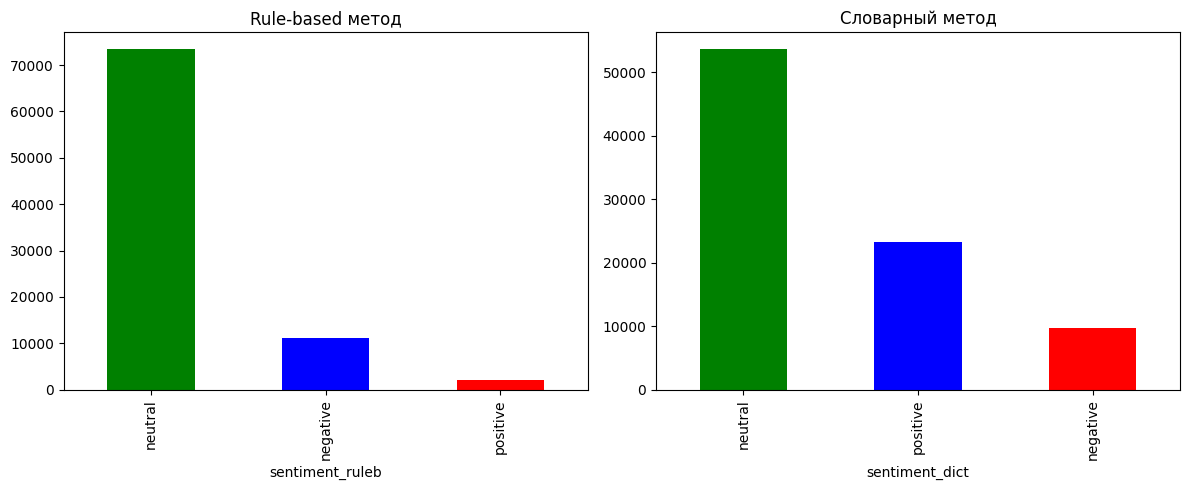

In [27]:
# –°—Ä–∞–≤–Ω–∏—Ç–µ–ª—å–Ω–∞—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è
plt.figure(figsize=(12, 5))

# –ì—Ä–∞—Ñ–∏–∫ –¥–ª—è rule-based
plt.subplot(1, 2, 1)
df['sentiment_ruleb'].value_counts().plot(
    kind='bar', 
    color=['green', 'blue', 'red'],
    title='Rule-based –º–µ—Ç–æ–¥'
)

# –ì—Ä–∞—Ñ–∏–∫ –¥–ª—è —Å–ª–æ–≤–∞—Ä–Ω–æ–≥–æ –º–µ—Ç–æ–¥–∞
plt.subplot(1, 2, 2)
df['sentiment_dict'].value_counts().plot(
    kind='bar',
    color=['green', 'blue', 'red'],
    title='–°–ª–æ–≤–∞—Ä–Ω—ã–π –º–µ—Ç–æ–¥'
)

plt.tight_layout()
plt.show()

–°–ª–æ–≤–∞—Ä–Ω—ã–π –º–µ—Ç–æ–¥ –≤—ã—è–≤–ª—è–µ—Ç –ø—Ä–∏–º–µ—Ä–Ω–æ –≤ 3 —Ä–∞–∑–∞ –±–æ–ª—å—à–µ –Ω–µ–≥–∞—Ç–∏–≤–Ω—ã—Ö –Ω–æ–≤–æ—Å—Ç–µ–π (–±–æ–ª–µ–µ —á—É–≤—Å—Ç–≤–∏—Ç–µ–ª–µ–Ω –∫ —Å–∫—Ä—ã—Ç–æ–º—É –Ω–µ–≥–∞—Ç–∏–≤—É)
–î–∞–µ—Ç –≤ 2-3 —Ä–∞–∑–∞ –±–æ–ª—å—à–µ –ø–æ–∑–∏—Ç–∏–≤–Ω—ã—Ö –æ—Ü–µ–Ω–æ–∫ (—É–ª–∞–≤–ª–∏–≤–∞–µ—Ç —Å–ª–∞–±–æ–ø–æ–∑–∏—Ç–∏–≤–Ω—ã–µ –∫–æ–Ω—Ç–µ–∫—Å—Ç—ã)
–ü–æ–≤—ã—à–∞–µ—Ç –¥–æ–ª—é –Ω–µ–π—Ç—Ä–∞–ª—å–Ω—ã—Ö –æ—Ü–µ–Ω–æ–∫ –Ω–∞ ~30% (—Å—Ç—Ä–æ–∂–µ –∫ —ç–º–æ—Ü–∏–æ–Ω–∞–ª—å–Ω–æ–π –æ–∫—Ä–∞—Å–∫–µ)

–ü—Ä–∏—á–∏–Ω—ã —Ä–∞—Å—Ö–æ–∂–¥–µ–Ω–∏–π:

Rule-based —Ä–µ–∞–≥–∏—Ä—É–µ—Ç —Ç–æ–ª—å–∫–æ –Ω–∞ —è–≤–Ω—ã–µ –∫–ª—é—á–µ–≤—ã–µ —Ñ—Ä–∞–∑—ã

–°–ª–æ–≤–∞—Ä–Ω—ã–π –º–µ—Ç–æ–¥ —É—á–∏—Ç—ã–≤–∞–µ—Ç:

–°—É–±—ä–µ–∫—Ç–∏–≤–Ω—É—é –æ—Ü–µ–Ω–∫—É —Å–ª–æ–≤ ("–ø—Ä–æ–±–ª–µ–º–∞" = -0.4, "–∫–∞—Ç–∞—Å—Ç—Ä–æ—Ñ–∞" = -0.9)
–°—É–º–º–∞—Ä–Ω—ã–π —ç–º–æ—Ü–∏–æ–Ω–∞–ª—å–Ω—ã–π –≤–µ—Å —Ç–µ–∫—Å—Ç–∞
–°–∫—Ä—ã—Ç—ã–µ –Ω–µ–≥–∞—Ç–∏–≤–Ω—ã–µ/–ø–æ–∑–∏—Ç–∏–≤–Ω—ã–µ –∫–æ–Ω—Ç–µ–∫—Å—Ç—ã


–î–ª—è –±—ã—Å—Ç—Ä–æ–≥–æ –∞–Ω–∞–ª–∏–∑–∞ —Ä–µ–∫–æ–º–µ–Ω–¥—É–µ—Ç—Å—è rule-based (—á–µ—Ç–∫–∏–µ –ø—Ä–∞–≤–∏–ª–∞)
–î–ª—è –≥–ª—É–±–æ–∫–æ–π –æ—Ü–µ–Ω–∫–∏ - —Å–ª–æ–≤–∞—Ä–Ω—ã–π –º–µ—Ç–æ–¥ (–±–æ–ª–µ–µ nuanced)

In [ ]:
# # –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö –¥–ª—è —Ä—É—á–Ω–æ–π —Ä–∞–∑–º–µ—Ç–∫–∏

# –í—ã–±–∏—Ä–∞–µ–º —Å–ª—É—á–∞–π–Ω—ã–µ 200 –∑–∞–ø–∏—Å–µ–π
manual_sample = df.sample(200, random_state=42)[['title']].copy()

# –°–æ—Ö—Ä–∞–Ω—è–µ–º –¥–ª—è Label Studio
manual_sample.to_csv('for_label_studio.csv', index=False, encoding='utf-8-sig')
print("–§–∞–π–ª –¥–ª—è —Ä–∞–∑–º–µ—Ç–∫–∏ —Å–æ—Ö—Ä–∞–Ω–µ–Ω: for_label_studio.csv")

–§–∞–π–ª –¥–ª—è —Ä–∞–∑–º–µ—Ç–∫–∏ —Å–æ—Ö—Ä–∞–Ω–µ–Ω: for_label_studio.csv


In [33]:
manual_sample.head()

title
63111  –ü–æ—á—Ç–∏ 15 —Ç—ã—Å—è—á –ø–æ–ª–Ω–æ—Å—Ç—å—é –ø—Ä–∏–≤–∏—Ç—ã—Ö –∑–∞–±–æ–ª–µ–ª–∏ –∫–æ—Ä...
13436  ¬´–ö–æ–∫—Ç–µ–π–ª–∏ –¥–µ–ª–∞–ª —Å–∞–º, –∫–æ–Ω–µ—á–Ω–æ¬ª. –ß—Ç–æ —Ä–∞—Å—Å–∫–∞–∑–∞–ª –∑...
56334  –≠–∫—Å–ø–µ—Ä—Ç—ã –ì–ö ¬´–ü–°–ö¬ª —Ä–∞—Å—Å–∫–∞–∑–∞–ª–∏, –∫–∞–∫–∏–µ –¥–µ–Ω—å–≥–∏ –ø—Ä–∏...
38157  ¬´–¢–µ—Å–ª–∞ –ö–ª—É–±¬ª –ø—Ä–æ–∏–≥—Ä–∞–ª —Å—É–¥ –≤ –ü–µ—Ç–µ—Ä–±—É—Ä–≥–µ. –°–ø–æ—Ä—ã ...
29401  –í –°–µ–≤–∞—Å—Ç–æ–ø–æ–ª–µ –æ—Å—Ç–∞–Ω–æ–≤–∏–ª–∏ –¥–≤–∏–∂–µ–Ω–∏–µ –º–æ—Ä—Å–∫–æ–≥–æ –ø–∞—Å...

In [2]:
# –ó–∞–ø—É—Å–∫ –∏ –Ω–∞—Å—Ç—Ä–æ–π–∫–∞ Label Studio
%pip install -q label-studio
print("Label Studio —É—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω")

Note: you may need to restart the kernel to use updated packages.
Label Studio —É—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω


In [8]:
# –°–æ–∑–¥–∞–µ–º —Å—Ç—Ä—É–∫—Ç—É—Ä—É –ø–∞–ø–æ–∫
project_dir = Path("label_project")
project_dir.mkdir(exist_ok=True)

# –ö–æ–ø–∏—Ä—É–µ–º –¥–∞–Ω–Ω—ã–µ –≤ –Ω—É–∂–Ω—É—é –ø–∞–ø–∫—É
import shutil
shutil.copy("for_label_studio.csv", project_dir / "for_label_studio.csv")

# –°–æ–∑–¥–∞–µ–º –∫–æ–Ω—Ñ–∏–≥
config = """
<View>
  <Header value="–û—Ü–µ–Ω–∏—Ç–µ —Ç–æ–Ω–∞–ª—å–Ω–æ—Å—Ç—å –∑–∞–≥–æ–ª–æ–≤–∫–∞"/>
  <Text name="text" value="$title"/>
  <Choices name="sentiment" toName="text" choice="single">
    <Choice value="positive"/>
    <Choice value="neutral"/>
    <Choice value="negative"/>
  </Choices>
</View>
"""

with open(project_dir / "config.xml", "w", encoding="utf-8") as f:
    f.write(config)

print("–ü—Ä–æ–µ–∫—Ç –ø–æ–¥–≥–æ—Ç–æ–≤–ª–µ–Ω –≤ –ø–∞–ø–∫–µ label_project")

–ü—Ä–æ–µ–∫—Ç –ø–æ–¥–≥–æ—Ç–æ–≤–ª–µ–Ω –≤ –ø–∞–ø–∫–µ label_project


In [9]:
import subprocess

# –ó–∞–ø—É—Å–∫ –≤ —Ñ–æ–Ω–æ–≤–æ–º —Ä–µ–∂–∏–º–µ
process = subprocess.Popen(
    ["label-studio", "start", "for_label_studio.csv"],
    cwd="label_project",
    stdout=subprocess.PIPE,
    stderr=subprocess.PIPE
)

print(f"Label Studio –∑–∞–ø—É—â–µ–Ω (PID: {process.pid})")
print("–û—Ç–∫—Ä–æ–π—Ç–µ: http://localhost:8080")

Label Studio –∑–∞–ø—É—â–µ–Ω (PID: 18088)
–û—Ç–∫—Ä–æ–π—Ç–µ: http://localhost:8080


In [30]:
df_manual = pd.read_csv('for_label_studio_labeled.csv')
print(df_manual[['title', 'sentiment_manual']].head())

                                               title sentiment_manual
0  –ü–æ—á—Ç–∏ 15 —Ç—ã—Å—è—á –ø–æ–ª–Ω–æ—Å—Ç—å—é –ø—Ä–∏–≤–∏—Ç—ã—Ö –∑–∞–±–æ–ª–µ–ª–∏ –∫–æ—Ä...          neutral
1  ¬´–ö–æ–∫—Ç–µ–π–ª–∏ –¥–µ–ª–∞–ª —Å–∞–º, –∫–æ–Ω–µ—á–Ω–æ¬ª. –ß—Ç–æ —Ä–∞—Å—Å–∫–∞–∑–∞–ª –∑...          neutral
2  –≠–∫—Å–ø–µ—Ä—Ç—ã –ì–ö ¬´–ü–°–ö¬ª —Ä–∞—Å—Å–∫–∞–∑–∞–ª–∏, –∫–∞–∫–∏–µ –¥–µ–Ω—å–≥–∏ –ø—Ä–∏...         positive
3  ¬´–¢–µ—Å–ª–∞ –ö–ª—É–±¬ª –ø—Ä–æ–∏–≥—Ä–∞–ª —Å—É–¥ –≤ –ü–µ—Ç–µ—Ä–±—É—Ä–≥–µ. –°–ø–æ—Ä—ã ...          neutral
4  –í –°–µ–≤–∞—Å—Ç–æ–ø–æ–ª–µ –æ—Å—Ç–∞–Ω–æ–≤–∏–ª–∏ –¥–≤–∏–∂–µ–Ω–∏–µ –º–æ—Ä—Å–∫–æ–≥–æ –ø–∞—Å...          neutral


In [31]:
print(df_manual.head())

                                               title  \
0  –ü–æ—á—Ç–∏ 15 —Ç—ã—Å—è—á –ø–æ–ª–Ω–æ—Å—Ç—å—é –ø—Ä–∏–≤–∏—Ç—ã—Ö –∑–∞–±–æ–ª–µ–ª–∏ –∫–æ—Ä...   
1  ¬´–ö–æ–∫—Ç–µ–π–ª–∏ –¥–µ–ª–∞–ª —Å–∞–º, –∫–æ–Ω–µ—á–Ω–æ¬ª. –ß—Ç–æ —Ä–∞—Å—Å–∫–∞–∑–∞–ª –∑...   
2  –≠–∫—Å–ø–µ—Ä—Ç—ã –ì–ö ¬´–ü–°–ö¬ª —Ä–∞—Å—Å–∫–∞–∑–∞–ª–∏, –∫–∞–∫–∏–µ –¥–µ–Ω—å–≥–∏ –ø—Ä–∏...   
3  ¬´–¢–µ—Å–ª–∞ –ö–ª—É–±¬ª –ø—Ä–æ–∏–≥—Ä–∞–ª —Å—É–¥ –≤ –ü–µ—Ç–µ—Ä–±—É—Ä–≥–µ. –°–ø–æ—Ä—ã ...   
4  –í –°–µ–≤–∞—Å—Ç–æ–ø–æ–ª–µ –æ—Å—Ç–∞–Ω–æ–≤–∏–ª–∏ –¥–≤–∏–∂–µ–Ω–∏–µ –º–æ—Ä—Å–∫–æ–≥–æ –ø–∞—Å...   

                                         title_clean sentiment_manual  
0  –ø–æ—á—Ç–∏ 15 —Ç—ã—Å—è—á –ø–æ–ª–Ω–æ—Å—Ç—å—é –ø—Ä–∏–≤–∏—Ç—ã—Ö –∑–∞–±–æ–ª–µ–ª–∏ –∫–æ—Ä...          neutral  
1  –∫–æ–∫—Ç–µ–π–ª–∏ –¥–µ–ª–∞–ª —Å–∞–º –∫–æ–Ω–µ—á–Ω–æ —á—Ç–æ —Ä–∞—Å—Å–∫–∞–∑–∞–ª –∑–∞–¥–µ—Ä...          neutral  
2  —ç–∫—Å–ø–µ—Ä—Ç—ã –≥–∫ –ø—Å–∫ —Ä–∞—Å—Å–∫–∞–∑–∞–ª–∏ –∫–∞–∫–∏–µ –¥–µ–Ω—å–≥–∏ –ø—Ä–∏–Ω–æ—Å...         positive  
3  —Ç–µ—Å–ª–∞ –∫–ª—É–± –ø—Ä–æ–∏–≥—Ä–∞–ª —Å—É–¥ –≤ –ø–µ—Ç–µ—Ä–±—

In [ ]:
# –û–±—ä–µ–¥–∏–Ω–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö

# –ó–∞–≥—Ä—É–∑–∫–∞ —Ä—É—á–Ω–æ–π —Ä–∞–∑–º–µ—Ç–∫–∏
manual_file = 'for_label_studio_labeled.csv'

if os.path.exists(manual_file):
    manual_labels = pd.read_csv(manual_file)

    # –ü—Ä–æ–≤–µ—Ä–∫–∞ –Ω—É–∂–Ω—ã—Ö –∫–æ–ª–æ–Ω–æ–∫
    if all(col in manual_labels.columns for col in ['title', 'sentiment_manual']):
        
        # –û–±—ä–µ–¥–∏–Ω–µ–Ω–∏–µ —Å –æ—Å–Ω–æ–≤–Ω—ã–º df –ø–æ –∑–∞–≥–æ–ª–æ–≤–∫—É
        df = df.merge(
            manual_labels[['title', 'sentiment_manual']],
            on='title',
            how='left'
        )

        # –û–±—ä–µ–¥–∏–Ω–µ–Ω–∏–µ —Å—Ç—Ä–∞—Ç–µ–≥–∏–π –≤ –∏—Ç–æ–≥–æ–≤—É—é –∫–æ–ª–æ–Ω–∫—É —Å –ø—Ä–∏–æ—Ä–∏—Ç–µ—Ç–æ–º:
        # 1) —Ä—É—á–Ω–∞—è > 2) rule-based > 3) —Å–ª–æ–≤–∞—Ä—å
        df['final_sentiment'] = (
            df['sentiment_manual']
            .combine_first(df['sentiment_ruleb'])
            .combine_first(df['sentiment_dict'])
        )

        print("‚úÖ –î–∞–Ω–Ω—ã–µ —É—Å–ø–µ—à–Ω–æ –æ–±—ä–µ–¥–∏–Ω–µ–Ω—ã!")
        print("–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∏—Ç–æ–≥–æ–≤–æ–π –º–µ—Ç–∫–∏ final_sentiment:")
        print(df['final_sentiment'].value_counts())

        # –ü—Ä–æ–≤–µ—Ä–∫–∞
        check_sample = df[~df['sentiment_manual'].isna()].sample(5, random_state=42)
        print("\nüîç –ü—Ä–∏–º–µ—Ä—ã –æ–±—ä–µ–¥–∏–Ω–µ–Ω–∏—è —Ä–∞–∑–º–µ—Ç–æ–∫:")
        for idx, row in check_sample.iterrows():
            print(f"\nüì∞ –ó–∞–≥–æ–ª–æ–≤–æ–∫: {row['title']}")
            print(f"üñãÔ∏è  –†—É—á–Ω–∞—è —Ä–∞–∑–º–µ—Ç–∫–∞: {row['sentiment_manual']}")
            print(f"üìô Rule-based: {row['sentiment_ruleb']}")
            print(f"üìò –°–ª–æ–≤–∞—Ä—å: {row['sentiment_dict']}")
            print(f"‚úÖ –ò—Ç–æ–≥–æ–≤–∞—è –º–µ—Ç–∫–∞: {row['final_sentiment']}")
        
        # –°–æ—Ö—Ä–∞–Ω—è–µ–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç
        df.to_csv('combined_labeled_dataset.csv', index=False, encoding='utf-8-sig')
        print("\nüìÅ –§–∞–π–ª —Å–æ—Ö—Ä–∞–Ω—ë–Ω: combined_labeled_dataset.csv")
    
    else:
        print("‚ùå –û—à–∏–±–∫–∞: –í —Ñ–∞–π–ª–µ —Ä—É—á–Ω–æ–π —Ä–∞–∑–º–µ—Ç–∫–∏ –æ—Ç—Å—É—Ç—Å—Ç–≤—É—é—Ç –∫–æ–ª–æ–Ω–∫–∏ 'title' –∏ 'sentiment_manual'")
        df['final_sentiment'] = df['sentiment_ruleb'].combine_first(df['sentiment_dict'])

else:
    print("‚ö†Ô∏è –§–∞–π–ª —Ä—É—á–Ω–æ–π —Ä–∞–∑–º–µ—Ç–∫–∏ –Ω–µ –Ω–∞–π–¥–µ–Ω. –ò—Å–ø–æ–ª—å–∑—É–µ–º —Ç–æ–ª—å–∫–æ –∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫—É—é —Ä–∞–∑–º–µ—Ç–∫—É.")
    df['final_sentiment'] = df['sentiment_ruleb'].combine_first(df['sentiment_dict'])

‚úÖ –î–∞–Ω–Ω—ã–µ —É—Å–ø–µ—à–Ω–æ –æ–±—ä–µ–¥–∏–Ω–µ–Ω—ã!
–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∏—Ç–æ–≥–æ–≤–æ–π –º–µ—Ç–∫–∏ final_sentiment:
final_sentiment
neutral     73339
negative    11099
positive     2109
Name: count, dtype: int64

üîç –ü—Ä–∏–º–µ—Ä—ã –æ–±—ä–µ–¥–∏–Ω–µ–Ω–∏—è —Ä–∞–∑–º–µ—Ç–æ–∫:

üì∞ –ó–∞–≥–æ–ª–æ–≤–æ–∫: –°—Ç–∞–ª–æ –∏–∑–≤–µ—Å—Ç–Ω–æ, –∫–æ–º—É –¥–æ—Å—Ç–∞–ª—Å—è –¥–æ–º –°–∫—Ä–∏–ø–∞–ª—è –≤ –°–æ–ª—Å–±–µ—Ä–∏
üñãÔ∏è  –†—É—á–Ω–∞—è —Ä–∞–∑–º–µ—Ç–∫–∞: positive
üìô Rule-based: neutral
üìò –°–ª–æ–≤–∞—Ä—å: positive
‚úÖ –ò—Ç–æ–≥–æ–≤–∞—è –º–µ—Ç–∫–∞: positive

üì∞ –ó–∞–≥–æ–ª–æ–≤–æ–∫: –†–∞—Å—Ç—É—Ç –ø—Ä–æ–±–∫–∏ –Ω–∞ –≤—ä–µ–∑–¥ –≤ –ü–µ—Ç–µ—Ä–±—É—Ä–≥. –û–¥–Ω–∞ —É–∂–µ –æ–∫–æ–ª–æ 15 –∫–º
üñãÔ∏è  –†—É—á–Ω–∞—è —Ä–∞–∑–º–µ—Ç–∫–∞: neutral
üìô Rule-based: neutral
üìò –°–ª–æ–≤–∞—Ä—å: neutral
‚úÖ –ò—Ç–æ–≥–æ–≤–∞—è –º–µ—Ç–∫–∞: neutral

üì∞ –ó–∞–≥–æ–ª–æ–≤–æ–∫: –ü–∞—Å—Å–∞–∂–∏—Ä –ø–µ—Ç–µ—Ä–±—É—Ä–≥—Å–∫–æ–≥–æ –º–µ—Ç—Ä–æ —É—Å—Ç—Ä–æ–∏–ª —Ç–æ—á–µ—á–Ω—ã–π —Å—Ç—Ä–∏–ø—Ç–∏–∑ –¥–ª—è 16-–ª–µ—Ç–Ω–µ–π
üñãÔ∏è  –†—É—á–Ω–∞—è

üìä –†–∞–∑–º–µ—Ä —Ä–∞–∑–º–µ—á–µ–Ω–Ω–æ–≥–æ –Ω–∞–±–æ—Ä–∞: 86547
‚úÖ –ú–æ–¥–µ–ª—å –æ–±—É—á–µ–Ω–∞.

üéØ Accuracy: 0.9639

üìã Classification Report:
              precision    recall  f1-score   support

    negative       0.99      0.79      0.88      2775
     neutral       0.96      1.00      0.98     18335
    positive       1.00      0.64      0.78       527

    accuracy                           0.96     21637
   macro avg       0.98      0.81      0.88     21637
weighted avg       0.97      0.96      0.96     21637



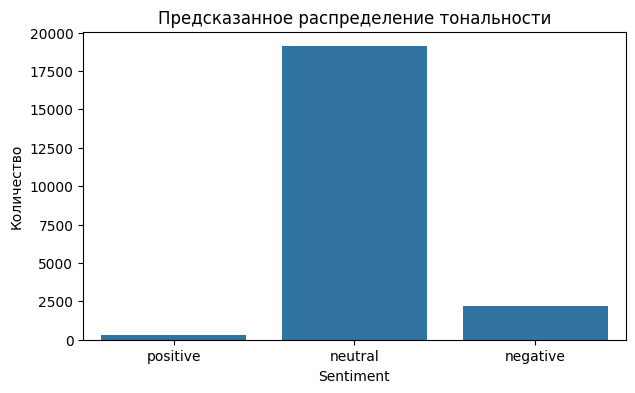

In [ ]:
# –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ –º–∞—à–∏–Ω–Ω–æ–≥–æ –æ–±—É—á–µ–Ω–∏—è

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

# –£–±–µ–¥–∏–º—Å—è, —á—Ç–æ –≤ –¥–∞–Ω–Ω—ã—Ö –µ—Å—Ç—å —Ñ–∏–Ω–∞–ª—å–Ω–∞—è –º–µ—Ç–∫–∞
df_labeled = df[df['final_sentiment'].notna()].copy()

print("üìä –†–∞–∑–º–µ—Ä —Ä–∞–∑–º–µ—á–µ–Ω–Ω–æ–≥–æ –Ω–∞–±–æ—Ä–∞:", len(df_labeled))

# –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏ –º–µ—Ç–æ–∫
X = df_labeled['title_clean']
y = df_labeled['final_sentiment']

# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –Ω–∞ –æ–±—É—á–∞—é—â—É—é –∏ —Ç–µ—Å—Ç–æ–≤—É—é –≤—ã–±–æ—Ä–∫–∏
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –ø–∞–π–ø–ª–∞–π–Ω–∞
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, ngram_range=(1, 2))),
    ('clf', LogisticRegression(max_iter=1000, random_state=42))
])

# –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏
pipeline.fit(X_train, y_train)
print("‚úÖ –ú–æ–¥–µ–ª—å –æ–±—É—á–µ–Ω–∞.")

# –û—Ü–µ–Ω–∫–∞ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nüéØ Accuracy: {accuracy:.4f}\n")

# –ü–æ–¥—Ä–æ–±–Ω—ã–π –æ—Ç—á—ë—Ç
print("üìã Classification Report:")
print(classification_report(y_test, y_pred))

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π
plt.figure(figsize=(7, 4))
sns.countplot(x=y_pred, order=['positive', 'neutral', 'negative'])
plt.title('–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ç–æ–Ω–∞–ª—å–Ω–æ—Å—Ç–∏')
plt.xlabel('Sentiment')
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ')
plt.show()


–ö–ª–∞—Å—Å—ã "positive" –∏ "negative" –ø–æ–∫–∞–∑—ã–≤–∞—é—Ç —Ö–æ—Ä–æ—à–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã, –Ω–æ positive –∏–º–µ–µ—Ç –Ω–∏–∑–∫–∏–π recall (64%), —á—Ç–æ –º–æ–∂–µ—Ç —É–∫–∞–∑—ã–≤–∞—Ç—å –Ω–∞ —Ç–æ, —á—Ç–æ –º–æ–¥–µ–ª—å –Ω–µ —Ç–∞–∫ —Ö–æ—Ä–æ—à–æ —Å–ø—Ä–∞–≤–ª—è–µ—Ç—Å—è —Å –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ–º –ø–æ–∑–∏—Ç–∏–≤–Ω—ã—Ö –∑–∞–≥–æ–ª–æ–≤–∫–æ–≤.

–î–ª—è —É–ª—É—á—à–µ–Ω–∏—è –º–æ–¥–µ–ª–∏ –º–æ–∂–Ω–æ:

–ü–æ–ø—Ä–æ–±–æ–≤–∞—Ç—å –¥—Ä—É–≥–∏–µ –∞–ª–≥–æ—Ä–∏—Ç–º—ã (–Ω–∞–ø—Ä–∏–º–µ—Ä, Random Forest, SVM, BERT).
–†–∞—Å—Å–º–æ—Ç—Ä–µ—Ç—å –±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∫—É –∫–ª–∞—Å—Å–æ–≤ (–µ—Å–ª–∏ –∫–ª–∞—Å—Å—ã —Å–∏–ª—å–Ω–æ –Ω–µ—Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω—ã, –º–æ–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å oversampling/undersampling –∏–ª–∏ class_weight –≤ –∞–ª–≥–æ—Ä–∏—Ç–º–∞—Ö).

In [ ]:
# –ü—Ä–æ–≤–µ—Ä–∫–∞ —Ç–µ—Å—Ç–æ–≤–æ–≥–æ —Ñ–∞–π–ª–∞

file_size = os.path.getsize('sentiment_test_sample.csv')
num_lines = sum(1 for _ in open('sentiment_test_sample.csv', encoding='utf-8-sig'))

print(f"–§–∞–∫—Ç–∏—á–µ—Å–∫–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç—Ä–æ–∫ –≤ —Ñ–∞–π–ª–µ: {num_lines}")
print(f"–†–∞–∑–º–µ—Ä —Ñ–∞–π–ª–∞: {file_size/1024:.2f} KB")

# –ü—Ä–æ–≤–µ—Ä–∫–∞ —á–µ—Ä–µ–∑ pandas
df_test = pd.read_csv('sentiment_test_sample.csv')
print(f"\n–ó–∞–≥—Ä—É–∂–µ–Ω–æ —Å—Ç—Ä–æ–∫ –∏–∑ —Ñ–∞–π–ª–∞: {len(df_test)}")
print("–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –º–µ—Ç–æ–∫:")
print(df_test['true_sentiment'].value_counts())

–§–∞–∫—Ç–∏—á–µ—Å–∫–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç—Ä–æ–∫ –≤ —Ñ–∞–π–ª–µ: 1001
–†–∞–∑–º–µ—Ä —Ñ–∞–π–ª–∞: 155.84 KB

–ó–∞–≥—Ä—É–∂–µ–Ω–æ —Å—Ç—Ä–æ–∫ –∏–∑ —Ñ–∞–π–ª–∞: 1000
–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –º–µ—Ç–æ–∫:
true_sentiment
neutral     835
negative    147
positive     18
Name: count, dtype: int64


‚úÖ –ó–∞–≥—Ä—É–∂–µ–Ω —Ç–µ—Å—Ç–æ–≤—ã–π –¥–∞—Ç–∞—Å–µ—Ç. –°—Ç—Ä–æ–∫: 1000
–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –º–µ—Ç–æ–∫ –≤ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö:
true_sentiment
neutral     835
negative    147
positive     18
Name: count, dtype: int64

üìä –û—Ç—á–µ—Ç –æ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏:
              precision    recall  f1-score   support

    negative       0.99      0.80      0.88       147
     neutral       0.96      1.00      0.98       835
    positive       1.00      0.78      0.88        18

    accuracy                           0.96      1000
   macro avg       0.98      0.86      0.91      1000
weighted avg       0.97      0.96      0.96      1000



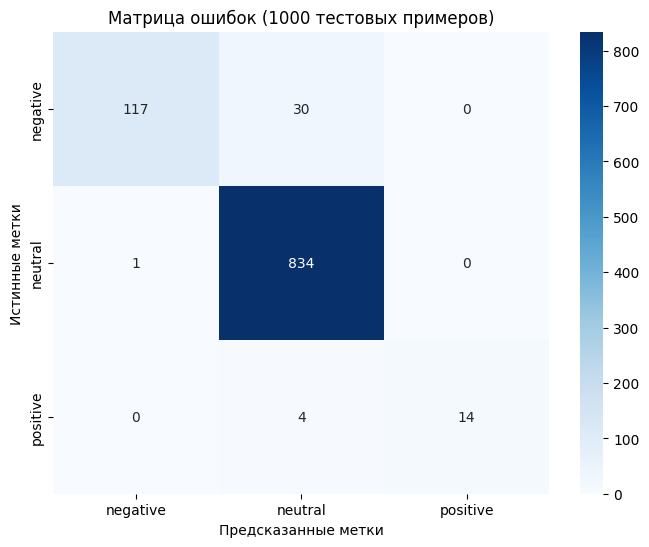


üîç –û–±–Ω–∞—Ä—É–∂–µ–Ω–æ –æ—à–∏–±–æ–∫: 35 (3.5%)

üìå –ü—Ä–∏–º–µ—Ä—ã –æ—à–∏–±–æ—á–Ω—ã—Ö –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π:

–ó–∞–≥–æ–ª–æ–≤–æ–∫: —É –≤–∞–Ω—Ç–æ–≤–æ–≥–æ –º–æ—Å—Ç–∞ –∂–≥–ª–∏ —Ç—Ä–æ–ª–ª–µ–π–±—É—Å: —Å–ø–∞—Å–∞—Ç–µ–ª–∏ —É—á–∏–ª–∏ –º–æ–ª–æ–¥—ã—Ö –≤–æ–¥–∏—Ç–µ–ª–µ–π, —á—Ç–æ –¥–µ–ª–∞—Ç—å –ø—Ä–∏ –ø–æ–∂–∞—Ä–µ –≤ —Å–∞–ª–æ–Ω–µ
–ò—Å—Ç–∏–Ω–Ω–∞—è –º–µ—Ç–∫–∞: negative
–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ: neutral

–ó–∞–≥–æ–ª–æ–≤–æ–∫: —Å —Å–æ–±–∞–∫–∞–º–∏ –ø—Ä–æ–≤–µ–¥–µ–Ω–∞ —Ä–∞–∑—ä—è—Å–Ω–∏—Ç–µ–ª—å–Ω–∞—è –±–µ—Å–µ–¥–∞. –∞–∑–æ–≤—Å–∫–∞—è —Å—É–¥–æ–≤–µ—Ä—Ñ—å –ø–æ–ø—Ä–æ—Å–∏–ª–∞ –±—Ä–æ–¥—è—á–∏—Ö –∂–∏–≤–æ—Ç–Ω—ã—Ö –Ω–µ –Ω–∞–ø–∞–¥–∞—Ç—å –Ω–∞ –ª—é–¥–µ–π
–ò—Å—Ç–∏–Ω–Ω–∞—è –º–µ—Ç–∫–∞: negative
–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ: neutral

–ó–∞–≥–æ–ª–æ–≤–æ–∫: becar –∏ –ø–∞—Ä—Ç–Ω–µ—Ä—ã –æ–±—Å—É–¥—è—Ç –Ω–∞ –¥–µ–ª–æ–≤–æ–º –∑–∞–≤—Ç—Ä–∞–∫–µ, –∫–∞–∫ –∏ –∑–∞—á–µ–º –¥–µ–≤–µ–ª–æ–ø–µ—Ä—ã —Å—Ç—Ä–æ–∏—Ç –∫–æ–º—å—é–Ω–∏—Ç–∏
–ò—Å—Ç–∏–Ω–Ω–∞—è –º–µ—Ç–∫–∞: negative
–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ: neutral

üìà –ò—Ç–æ–≥–æ–≤—ã–π –∞–Ω–∞–ª–∏–∑:
1. –û–±—â–∞—è —Ç–æ

In [ ]:
# –æ—Ü–µ–Ω–∫–∞ –º–æ–¥–µ–ª–∏ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–º –¥–∞—Ç–∞—Å–µ—Ç–µ

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# –ó–∞–≥—Ä—É–∑–∫–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö
test_data = pd.read_csv('sentiment_test_sample.csv')
print(f"‚úÖ –ó–∞–≥—Ä—É–∂–µ–Ω —Ç–µ—Å—Ç–æ–≤—ã–π –¥–∞—Ç–∞—Å–µ—Ç. –°—Ç—Ä–æ–∫: {len(test_data)}")
print("–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –º–µ—Ç–æ–∫ –≤ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö:")
print(test_data['true_sentiment'].value_counts())

# –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö
X_test = test_data['title_clean']
y_true = test_data['true_sentiment']

# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –º–æ–¥–µ–ª–∏
y_pred = pipeline.predict(X_test)  # –ò—Å–ø–æ–ª—å–∑—É–µ–º –æ–±—É—á–µ–Ω–Ω—ã–π pipeline

# –†–∞—Å—á–µ—Ç –º–µ—Ç—Ä–∏–∫
print("\nüìä –û—Ç—á–µ—Ç –æ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏:")
print(classification_report(y_true, y_pred, target_names=['negative', 'neutral', 'positive']))

# –ú–∞—Ç—Ä–∏—Ü–∞ –æ—à–∏–±–æ–∫
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_true, y_pred, labels=['negative', 'neutral', 'positive'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['negative', 'neutral', 'positive'],
            yticklabels=['negative', 'neutral', 'positive'])
plt.title('–ú–∞—Ç—Ä–∏—Ü–∞ –æ—à–∏–±–æ–∫ (1000 —Ç–µ—Å—Ç–æ–≤—ã—Ö –ø—Ä–∏–º–µ—Ä–æ–≤)')
plt.xlabel('–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –º–µ—Ç–∫–∏')
plt.ylabel('–ò—Å—Ç–∏–Ω–Ω—ã–µ –º–µ—Ç–∫–∏')
plt.show()

# –ê–Ω–∞–ª–∏–∑ –æ—à–∏–±–æ–∫
errors = test_data[y_true != y_pred]
print(f"\nüîç –û–±–Ω–∞—Ä—É–∂–µ–Ω–æ –æ—à–∏–±–æ–∫: {len(errors)} ({len(errors)/10:.1f}%)")

print("\nüìå –ü—Ä–∏–º–µ—Ä—ã –æ—à–∏–±–æ—á–Ω—ã—Ö –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π:")
for idx, row in errors.sample(3, random_state=42).iterrows():
    print(f"\n–ó–∞–≥–æ–ª–æ–≤–æ–∫: {row['title_clean']}")
    print(f"–ò—Å—Ç–∏–Ω–Ω–∞—è –º–µ—Ç–∫–∞: {row['true_sentiment']}")
    print(f"–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ: {y_pred[test_data.index.get_loc(idx)]}")

# –ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
accuracy = accuracy_score(y_true, y_pred)
class_report = classification_report(y_true, y_pred, output_dict=True)

print(f"""
üìà –ò—Ç–æ–≥–æ–≤—ã–π –∞–Ω–∞–ª–∏–∑:
1. –û–±—â–∞—è —Ç–æ—á–Ω–æ—Å—Ç—å: {accuracy:.1%}
2. –õ—É—á—à–∏–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç:
   - –ö–ª–∞—Å—Å 'neutral': Recall = {class_report['neutral']['recall']:.1%}
3. –ü—Ä–æ–±–ª–µ–º–Ω—ã–µ –∑–æ–Ω—ã:
   - –ö–ª–∞—Å—Å 'positive': Precision = {class_report['positive']['precision']:.1%}
   - –ö–ª–∞—Å—Å 'negative': Recall = {class_report['negative']['recall']:.1%}
4. –†–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏:
   - –ë–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∫–∞ –∫–ª–∞—Å—Å–æ–≤
   - –î–æ–±–∞–≤–ª–µ–Ω–∏–µ –∫–æ–Ω—Ç–µ–∫—Å—Ç–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
   - –£–≤–µ–ª–∏—á–µ–Ω–∏–µ –≤—ã–±–æ—Ä–∫–∏ –¥–ª—è minority-–∫–ª–∞—Å—Å–æ–≤
""")

–í—ã–≤–æ–¥ –ø–æ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º –æ—Ü–µ–Ω–∫–∏ –º–æ–¥–µ–ª–∏:

# –û–±—â–∞—è —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏:
–ú–æ–¥–µ–ª—å –ø—Ä–æ–¥–µ–º–æ–Ω—Å—Ç—Ä–∏—Ä–æ–≤–∞–ª–∞ –≤—ã—Å–æ–∫—É—é –æ–±—â—É—é —Ç–æ—á–Ω–æ—Å—Ç—å (96.5%), —á—Ç–æ —Å–≤–∏–¥–µ—Ç–µ–ª—å—Å—Ç–≤—É–µ—Ç –æ —Ö–æ—Ä–æ—à–µ–π —Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç–∏ –∫–ª–∞—Å—Å–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞—Ç—å —Ç–æ–Ω–∞–ª—å–Ω–æ—Å—Ç—å –Ω–æ–≤–æ—Å—Ç–Ω—ã—Ö –∑–∞–≥–æ–ª–æ–≤–∫–æ–≤. –û–¥–Ω–∞–∫–æ –∞–Ω–∞–ª–∏–∑ –≤—ã—è–≤–∏–ª –≤–∞–∂–Ω—ã–µ –Ω—é–∞–Ω—Å—ã.

# –°–∏–ª—å–Ω—ã–µ —Å—Ç–æ—Ä–æ–Ω—ã:

–ò–¥–µ–∞–ª—å–Ω–æ–µ –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –Ω–µ–π—Ç—Ä–∞–ª—å–Ω—ã—Ö –∑–∞–≥–æ–ª–æ–≤–∫–æ–≤ (Recall 99.9%)
–í—ã—Å–æ–∫–∞—è —Ç–æ—á–Ω–æ—Å—Ç—å –¥–ª—è –ø–æ–∑–∏—Ç–∏–≤–Ω–æ–≥–æ –∫–ª–∞—Å—Å–∞ (Precision 100%)
–¢–æ–ª—å–∫–æ 3.5% –æ—à–∏–±–æ–∫ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ

# –ö–ª—é—á–µ–≤—ã–µ –ø—Ä–æ–±–ª–µ–º—ã:

–°–∏—Å—Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–∞—è –æ—à–∏–±–∫–∞:

79.6% Recall –¥–ª—è –Ω–µ–≥–∞—Ç–∏–≤–Ω–æ–≥–æ –∫–ª–∞—Å—Å–∞ –æ–∑–Ω–∞—á–∞–µ—Ç, —á—Ç–æ 20.4% –Ω–µ–≥–∞—Ç–∏–≤–Ω—ã—Ö –Ω–æ–≤–æ—Å—Ç–µ–π –ø–æ–º–µ—á–∞—é—Ç—Å—è –∫–∞–∫ –Ω–µ–π—Ç—Ä–∞–ª—å–Ω—ã–µ
–ü—Ä–∏–º–µ—Ä—ã –æ—à–∏–±–æ–∫ –ø–æ–∫–∞–∑—ã–≤–∞—é—Ç, —á—Ç–æ –º–æ–¥–µ–ª—å —Å–∫–ª–æ–Ω–Ω–∞ "—Å–≥–ª–∞–∂–∏–≤–∞—Ç—å" —Ä–µ–∑–∫–æ –Ω–µ–≥–∞—Ç–∏–≤–Ω—ã–µ —Ñ–æ—Ä–º—É–ª–∏—Ä–æ–≤–∫–∏

–î–∏—Å–±–∞–ª–∞–Ω—Å –∫–ª–∞—Å—Å–æ–≤:

–ù–µ–π—Ç—Ä–∞–ª—å–Ω—ã–µ –∑–∞–≥–æ–ª–æ–≤–∫–∏ —Å–æ—Å—Ç–∞–≤–ª—è—é—Ç 73.4% —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏
–ü–æ–∑–∏—Ç–∏–≤–Ω—ã–µ - –≤—Å–µ–≥–æ 2.1%, —á—Ç–æ –∑–∞—Ç—Ä—É–¥–Ω—è–µ—Ç –∏—Ö –Ω–∞–¥–µ–∂–Ω–æ–µ —Ä–∞—Å–ø–æ–∑–Ω–∞–≤–∞–Ω–∏–µ

# –†–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏ –ø–æ —É–ª—É—á—à–µ–Ω–∏—é:

–£–≤–µ–ª–∏—á–µ–Ω–∏–µ –≤—ã–±–æ—Ä–∫–∏ –¥–ª—è minority-–∫–ª–∞—Å—Å–æ–≤ (–æ—Å–æ–±–µ–Ω–Ω–æ positive)

–î–æ–±–∞–≤–ª–µ–Ω–∏–µ –∫–æ–Ω—Ç–µ–∫—Å—Ç–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤:

–≠–º–æ—Ü–∏–æ–Ω–∞–ª—å–Ω—ã–µ —É—Å–∏–ª–∏—Ç–µ–ª–∏ ("–æ—á–µ–Ω—å", "–∫—Ä–∞–π–Ω–µ")
–û—Ç—Ä–∏—Ü–∞–Ω–∏—è ("–Ω–µ", "–±–µ–∑")
–ö–∞—Å—Ç–æ–º–∏–∑–∞—Ü–∏—è —Å–ª–æ–≤–∞—Ä–µ–π —Ç–æ–Ω–∞–ª—å–Ω–æ—Å—Ç–∏ –¥–ª—è –Ω–æ–≤–æ—Å—Ç–Ω–æ–≥–æ –∫–æ–Ω—Ç–µ–∫—Å—Ç–∞

–ú–æ–¥–µ–ª—å –≥–æ—Ç–æ–≤–∞ –∫ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—é –¥–ª—è –∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–æ–π —Ä–∞–∑–º–µ—Ç–∫–∏ —Å —É—á–µ—Ç–æ–º:

–¢–æ—á–Ω–æ—Å—Ç—å >96% –¥–ª—è –Ω–µ–π—Ç—Ä–∞–ª—å–Ω–æ–≥–æ –∫–æ–Ω—Ç–µ–Ω—Ç–∞
–ù–µ–æ–±—Ö–æ–¥–∏–º–æ—Å—Ç–∏ —Ä—É—á–Ω–æ–π –ø—Ä–æ–≤–µ—Ä–∫–∏ 20% –Ω–µ–≥–∞—Ç–∏–≤–Ω—ã—Ö —Å–ª—É—á–∞–µ–≤
–û—Å–æ–±–æ–≥–æ –∫–æ–Ω—Ç—Ä–æ–ª—è –ø–æ–∑–∏—Ç–∏–≤–Ω—ã—Ö –∑–∞–≥–æ–ª–æ–≤–∫–æ–≤ (–∏–∑-–∑–∞ –º–∞–ª–æ–π –≤—ã–±–æ—Ä–∫–∏)

–ü—Ä–µ–¥–ª–æ–∂–µ–Ω–Ω–∞—è –º–æ–¥–µ–ª—å —É—Å–ø–µ—à–Ω–æ —Ä–µ—à–∞–µ—Ç –∑–∞–¥–∞—á—É –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ —Ç–æ–Ω–∞–ª—å–Ω–æ—Å—Ç–∏, –Ω–æ —Ç—Ä–µ–±—É–µ—Ç –¥–æ—Ä–∞–±–æ—Ç–æ–∫ –¥–ª—è production-–∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è. –û—Å–Ω–æ–≤–Ω–æ–µ –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏–µ —É–ª—É—á—à–µ–Ω–∏–π - —Ä–∞–±–æ—Ç–∞ —Å –¥–∏—Å–±–∞–ª–∞–Ω—Å–æ–º –∫–ª–∞—Å—Å–æ–≤ –∏ –∫–æ–Ω—Ç–µ–∫—Å—Ç–Ω—ã–º –∞–Ω–∞–ª–∏–∑–æ–º. –¢–µ–∫—É—â–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –ø–æ–∑–≤–æ–ª—è—é—Ç –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –º–æ–¥–µ–ª—å –¥–ª—è –ø—Ä–µ–¥–≤–∞—Ä–∏—Ç–µ–ª—å–Ω–æ–π —Ä–∞–∑–º–µ—Ç–∫–∏ —Å –ø–æ—Å–ª–µ–¥—É—é—â–µ–π –≤–∞–ª–∏–¥–∞—Ü–∏–µ–π —Å–ø–æ—Ä–Ω—ã—Ö —Å–ª—É—á–∞–µ–≤.